# **Problem 1**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Country-data.csv')

# 1
numeric_df = df.drop('country', axis=1)
print(numeric_df)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89 

In [ ]:
#2
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)
print(scaled_df)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

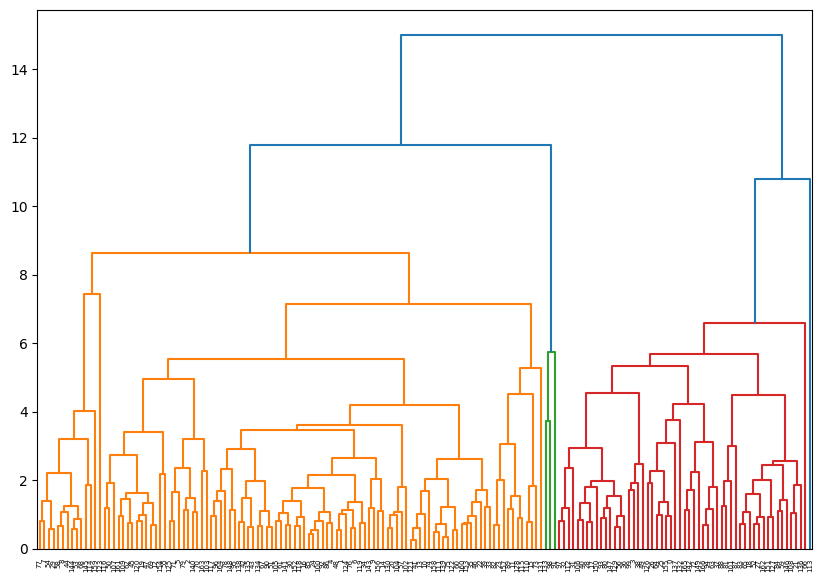

In [ ]:
# 3
linked = linkage(scaled_df, 'complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [ ]:
# 4
cluster_labels = cut_tree(linked, n_clusters=3).reshape(-1, )
df['Cluster_Labels'] = cluster_labels
print(df)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Cluster_Labels  
0         9.44        56.2       5.82    553    

In [ ]:
# 5
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(principalDf)

          PC1       PC2       PC3       PC4
0   -2.913025  0.095621 -0.718118  1.005255
1    0.429911 -0.588156 -0.333486 -1.161059
2   -0.285225 -0.455174  1.221505 -0.868115
3   -2.932423  1.695555  1.525044  0.839625
4    1.033576  0.136659 -0.225721 -0.847063
..        ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595
163 -0.551036 -1.233886  3.101350 -0.115311
164  0.498524  1.390744 -0.238526 -1.074098
165 -1.887451 -0.109453  1.109752  0.056257
166 -2.864064  0.485998  0.223167  0.816364

[167 rows x 4 columns]


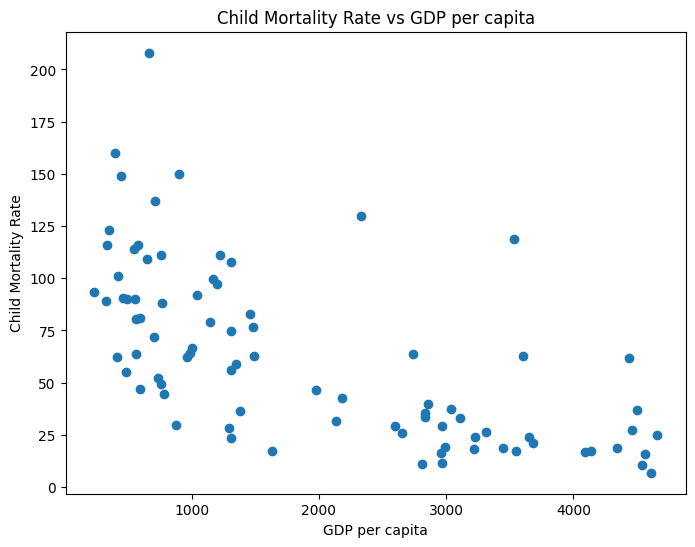

In [ ]:
# 6
low_gdp_df = df[df['gdpp'] <= df['gdpp'].median()]
plt.figure(figsize=(8,6))
plt.scatter(low_gdp_df['gdpp'], low_gdp_df['child_mort'])
plt.xlabel('GDP per capita')
plt.ylabel('Child Mortality Rate')
plt.title('Child Mortality Rate vs GDP per capita')
plt.show()

# **problem 2**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
#1
df2 = pd.read_csv('/content/Credit Card Customer Data.csv')
print(df2.columns)


Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [ ]:
#2
df2= df2.dropna()
df2 = df2.drop(['Avg_Credit_Limit', 'Total_Credit_Cards'], axis=1)
print(df2.describe())

            Sl_No  Customer Key  Total_visits_bank  Total_visits_online  \
count  660.000000    660.000000         660.000000           660.000000   
mean   330.500000  55141.443939           2.403030             2.606061   
std    190.669872  25627.772200           1.631813             2.935724   
min      1.000000  11265.000000           0.000000             0.000000   
25%    165.750000  33825.250000           1.000000             1.000000   
50%    330.500000  53874.500000           2.000000             2.000000   
75%    495.250000  77202.500000           4.000000             4.000000   
max    660.000000  99843.000000           5.000000            15.000000   

       Total_calls_made  
count        660.000000  
mean           3.583333  
std            2.865317  
min            0.000000  
25%            1.000000  
50%            3.000000  
75%            5.000000  
max           10.000000  


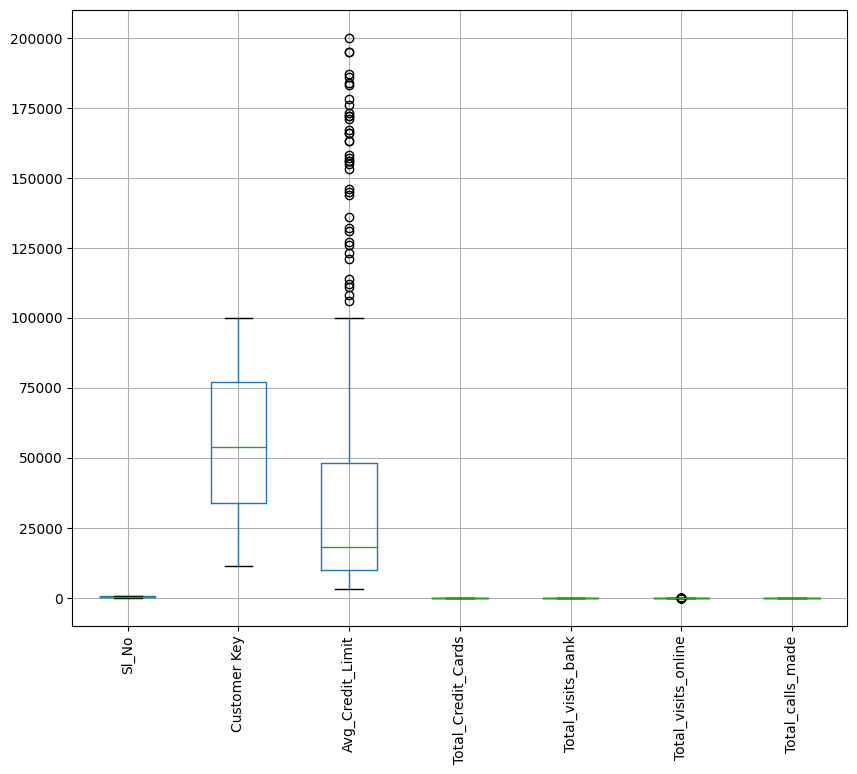

<Figure size 1000x800 with 0 Axes>

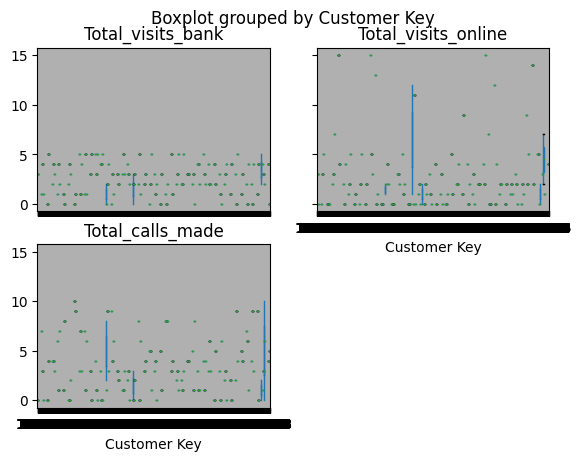

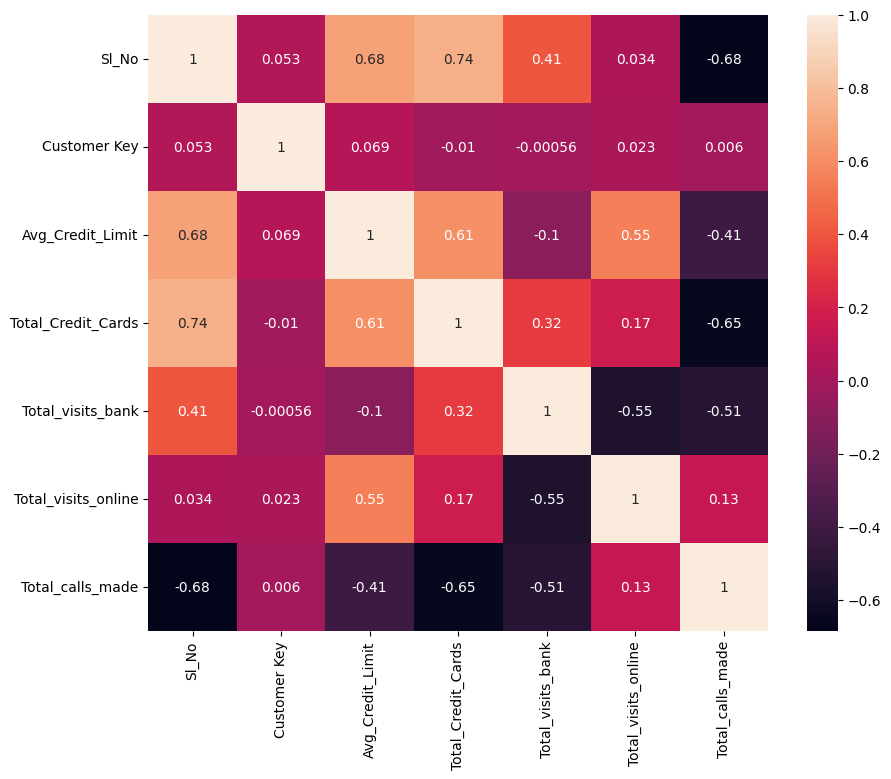

In [ ]:
#3
plt.figure(figsize=(10, 8))
df2.boxplot()
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 8))
df2.boxplot(by='Customer Key', column=['Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])
plt.show()

corr_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#4
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
print(df2)

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2              

In [ ]:
#5
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df2_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
#6
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df2_scaled)
score = silhouette_score(df2_scaled, kmeans.labels_, metric='euclidean')

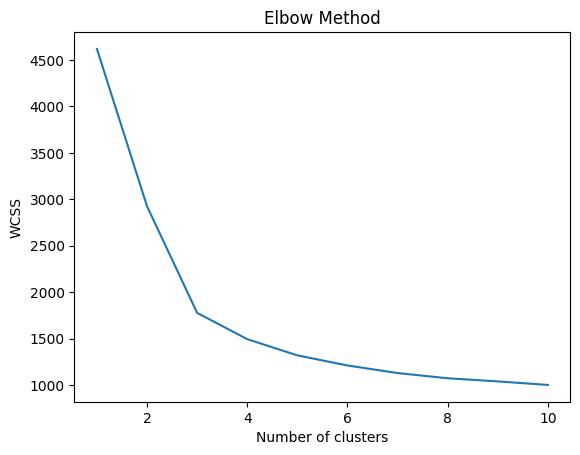

In [ ]:
# 7
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# 8
df2['cluster'] = pred_y
print(df2.groupby('cluster').mean())
plt.figure(figsize=(10, 8))

              Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
cluster                                                                   
0        611.280000  56708.760000     141040.000000            8.740000   
1        115.460177  55072.902655      12831.858407            2.433628   
2        420.500000  54977.705729      33507.812500            5.518229   

         Total_visits_bank  Total_visits_online  Total_calls_made  
cluster                                                            
0                 0.600000            10.900000          1.080000  
1                 0.929204             3.535398          6.827434  
2                 3.505208             0.979167          2.000000  


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [ ]:
#9
print("Centroids: ", kmeans.cluster_centers_)
print("\n \n Final Score: ", score)

Centroids:  [[ 1.47371450e+00  6.12033211e-02  2.83176409e+00  1.86222621e+00
  -1.10576269e+00  2.82731942e+00 -8.74329826e-01]
 [-1.12866766e+00 -2.67652094e-03 -5.78301453e-01 -1.04904475e+00
  -9.03868692e-01  3.16801726e-01  1.13305472e+00]
 [ 4.72378035e-01 -6.39393835e-03 -2.83647816e-02  3.74929177e-01
   6.75943903e-01 -5.54591566e-01 -5.53004884e-01]]

 
 Final Score:  0.44394092525170764


# **problem3**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
df3 = pd.read_csv('/content/Mall_Customers.csv')

# 1
correlation3= df3.corr()
print(correlation3)
least_corr_col = correlation.sum().idxmin()
df3 = df3.drop(columns=[least_corr_col])

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


<ipython-input-22-cdb74510fb7e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation3= df3.corr()


In [ ]:
# 2
df3 = pd.get_dummies(df3, columns=['Gender'])
print(df3)

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0             1                  15                      39              0   
1             2                  15                      81              0   
2             3                  16                       6              1   
3             4                  16                      77              1   
4             5                  17                      40              1   
..          ...                 ...                     ...            ...   
195         196                 120                      79              1   
196         197                 126                      28              1   
197         198                 126                      74              0   
198         199                 137                      18              0   
199         200                 137                      83              0   

     Gender_Male  
0              1  
1              1  
2     

In [ ]:
# 3
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3)
dbscan = DBSCAN(eps=12.5, min_samples=4)
clusters = dbscan.fit_predict(df3_scaled)

In [ ]:
# 4
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))

{0: 200}


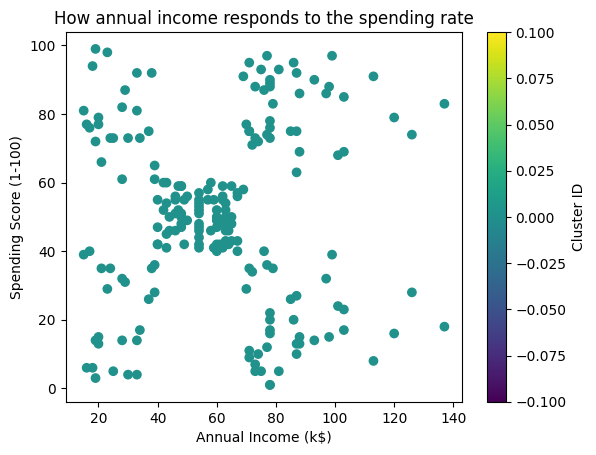

In [ ]:
#5
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster ID')
plt.title("How annual income responds to the spending rate")
plt.show()

# **Problem 4**

In [ ]:
import pandas as pd
#1
from mlxtend.frequent_patterns import apriori, association_rules
#2
df4 = pd.read_csv('Groceries data.csv')
# 3
print(df4[df4['Member_number'] == 1001])
# 4
df4['item_count'] = 1

       Member_number        Date     itemDescription  year  month  day  \
364             1001  2015-01-20         frankfurter  2015      1   20   
5695            1001  2015-02-05         frankfurter  2015      2    5   
6612            1001  2015-04-14                beef  2015      4   14   
9391            1001  2014-07-02             sausage  2014      7    2   
11046           1001  2014-12-12          whole milk  2014     12   12   
16513           1001  2015-01-20                soda  2015      1   20   
21844           1001  2015-02-05                curd  2015      2    5   
22761           1001  2015-04-14         white bread  2015      4   14   
25540           1001  2014-07-02          whole milk  2014      7    2   
27195           1001  2014-12-12                soda  2014     12   12   
32575           1001  2015-01-20  whipped/sour cream  2015      1   20   
32727           1001  2014-07-02          rolls/buns  2014      7    2   

       day_of_week  
364             

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 5
df4 = df4.drop(columns=['month', 'day', 'year', 'day_of_week'])
print(df4)
# 6
basket = df4.groupby(['Member_number', 'itemDescription'])['item_count'].sum().unstack().reset_index().fillna(0).set_index('Member_number')

# The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
#7
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

# 8
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       Member_number        Date        itemDescription  item_count
0               1808  2015-07-21         tropical fruit           1
1               2552  2015-05-01             whole milk           1
2               2300  2015-09-19              pip fruit           1
3               1187  2015-12-12       other vegetables           1
4               3037  2015-01-02             whole milk           1
...              ...         ...                    ...         ...
38760           4471  2014-08-10          sliced cheese           1
38761           2022  2014-02-23                  candy           1
38762           1097  2014-04-16               cake bar           1
38763           1510  2014-03-12  fruit/vegetable juice           1
38764           1521  2014-12-26               cat food           1

[38765 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#9
rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]
print(rules)

                       antecedents   consequents  antecedent support  \
1                   (bottled beer)  (whole milk)            0.158799   
8                  (bottled water)  (whole milk)            0.213699   
11                   (canned beer)  (whole milk)            0.165213   
18                 (domestic eggs)  (whole milk)            0.133145   
20                    (newspapers)  (whole milk)            0.139815   
39              (other vegetables)  (whole milk)            0.376603   
43                        (pastry)  (whole milk)            0.177527   
45                     (pip fruit)  (whole milk)            0.170600   
54                    (rolls/buns)  (whole milk)            0.349666   
66                       (sausage)  (whole milk)            0.206003   
70                 (shopping bags)  (whole milk)            0.168291   
82            (whipped/sour cream)  (whole milk)            0.154695   
84                        (yogurt)  (whole milk)            0.28

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
